In [1]:
import logging

import equation_database.isbn_9780511628788 as ref
import sympy
from feynml.interface.qgraf import style
from feynmodel.interface.qgraf import feynmodel_to_qgraf
from feynmodel.interface.ufo import load_ufo_model
from pyfeyn2.feynmandiagram import FeynML
from pyqgraf import qgraf
from xsdata.formats.dataclass.parsers import XmlParser

from feynamp.form import compute_squared

logger = logging.getLogger("feynamp")
logger.setLevel(logging.DEBUG)


	Please cite the following papers if you use this code:

      [1] Automatic Feynman graph generation J. Comput. Phys. 105 (1993) 279--289 https://doi.org/10.1006/jcph.1993.1074

      [2] Abusing Qgraf Nucl. Instrum. Methods Phys. Res. A 559 (2006) 220--223 https://doi.org/10.1016/j.nima.2005.11.151

      [3] Feynman graph generation and propagator mixing, I Comput. Phys. Commun. 269 (2021) 108103 https://doi.org/10.1016/j.cpc.2021.108103

	


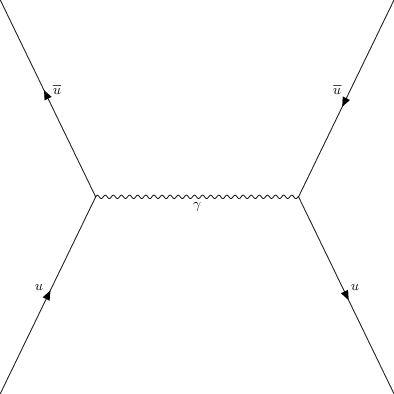

In [2]:
    fm = load_ufo_model("ufo_sm")
    qfm = feynmodel_to_qgraf(fm, True, False)

    qgraf.install()
    xml_string = qgraf.run(
        "u[p1], u_bar[p2]",
        "u[p3], u_bar[p4]",
        loops=0,
        loop_momentum="l",
        model=qfm,
        style=style,
    )

    parser = XmlParser()
    fml = parser.from_string(xml_string, FeynML)
    fds = [fml.diagrams[
           0
           #2
          ]]
    fds[0]

In [3]:
print(fml.diagrams[0])

FeynmanDiagram(id='Diagram1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Prop1', pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='-p1-p2', px=None, py=None, pz=None, e=None), source='Vert2', target='Vert1')], vertices=[Vertex(id='Vert1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id='Vert2', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id='In1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p1', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, shape=None, sens

In [4]:
print(fml.diagrams[0].conjugated())

FeynmanDiagram(id='Diagram1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Propagator14', pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='-p1-p2', px=None, py=None, pz=None, e=None), source='Vertex8', target='Vertex9')], vertices=[Vertex(id='Vertex8', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id='Vertex9', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id='Leg10', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p1', px=None, py=None, pz=None, e=None), target='Vertex8', x=None, y=None, z=Non

In [5]:
born = compute_squared(fds, fm, colorcorrelated=False)
born

INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:feynamp:lor='Gamma(3,2,1)'
DEBUG:feynamp:vertex_math=[('(2*ee*complex(0,1))/3.', 'Identity(ColorIn1,ColorIn2)', 'Gamma(MuInProp1,SpinIn2,SpinIn1)')]
INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:feynamp:lor='Gamma(3,2,1)'
DEBUG:feynamp:vertex_math=[('(2*ee*complex(0,1))/3.', 'Identity(ColorOut2,ColorOut1)', 'Gamma(MuOutProp1,SpinOut1,SpinOut2)')]
DEBUG:feynamp:ret='(((2*ee*complex(0,1))/3.)*(Identity(ColorIn1,ColorIn2))*(Gamma(MuInProp1,SpinIn2,SpinIn1))) * (((2*ee*complex(0,1))/3.)*(Identity(ColorOut2,ColorOut1))*(Gamma(MuOutProp1,SpinOut1,SpinOut2))) * (VC(ColorIn1,Mom_p1)*u(SpinIn1,Mom_p1)) * (VC(ColorIn2,Mom_p2)*v(SpinIn2,Mom_p2)) * (VC(ColorOut1,Mom_p3)*u_bar(SpinOut1,Mom_p3)) * (VC(ColorOut2,Mom_p4)*v_bar(SpinOut2,Mom_p4)) * ((-1)*complex(0,1)*Metric(MuInProp1,MuOutProp1)*Denom(-Mom_p1-Mom_p2,0)) * '
INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:fey

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:pol_sums: 


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:rs='(128/81*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*ee^4*msu^2+128/81*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*ee^4*mst^2)'


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:rr='(128/81*1/(mss)^2*Nc^2*ee^4*msu^2+128/81*1/(mss)^2*Nc^2*ee^4*mst^2)'
DEBUG:feynamp:get_color_average():['1/3', '1/3']
DEBUG:feynamp:get_spin_average():['1/2', '1/2']


32*Nc**2*ee**4*t**2/(729*s**2) + 32*Nc**2*ee**4*u**2/(729*s**2)

In [6]:
ret = compute_squared(fds, fm, colorcorrelated=True)
ret

INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:feynamp:lor='Gamma(3,2,1)'
DEBUG:feynamp:vertex_math=[('(2*ee*complex(0,1))/3.', 'Identity(ColorIn1,ColorIn2)', 'Gamma(MuInProp1,SpinIn2,SpinIn1)')]
INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:feynamp:lor='Gamma(3,2,1)'
DEBUG:feynamp:vertex_math=[('(2*ee*complex(0,1))/3.', 'Identity(ColorOut2,ColorOut1)', 'Gamma(MuOutProp1,SpinOut1,SpinOut2)')]
DEBUG:feynamp:ret='(((2*ee*complex(0,1))/3.)*(Identity(ColorIn1,ColorIn2))*(Gamma(MuInProp1,SpinIn2,SpinIn1))) * (((2*ee*complex(0,1))/3.)*(Identity(ColorOut2,ColorOut1))*(Gamma(MuOutProp1,SpinOut1,SpinOut2))) * (VC(ColorIn1,Mom_p1)*u(SpinIn1,Mom_p1)) * (VC(ColorIn2,Mom_p2)*v(SpinIn2,Mom_p2)) * (VC(ColorOut1,Mom_p3)*u_bar(SpinOut1,Mom_p3)) * (VC(ColorOut2,Mom_p4)*v_bar(SpinOut2,Mom_p4)) * ((-1)*complex(0,1)*Metric(MuInProp1,MuOutProp1)*Denom(-Mom_p1-Mom_p2,0)) * '
INFO:feynamp:v.color=['Identity(1,2)']
INFO:feynamp:v.lorentz=[FFV1]
DEBUG:fey


    id VC(ColorIn1 ,Mom_p1)*VC(ColorN9?,Mom_p1)*VC(ColorN10?,Mom_p2)*VC(ColorIn2 ,Mom_p2)*VC(ColorN11?,Mom_p3)*VC(ColorOut1 ,Mom_p3)*VC(ColorOut2 ,Mom_p4)*VC(ColorN12?,Mom_p4) = 
colorcorrelation(Mom_p1,Mom_p2)*T(ColorIn1,ColorN9,GluN13)*T(ColorN10,ColorIn2,GluN13)*df(ColorOut1,ColorN11)*df(ColorOut2,ColorN12)+
colorcorrelation(Mom_p1,Mom_p3)*T(ColorIn1,ColorN9,GluN13)*T(ColorN11,ColorOut1,GluN13)*df(ColorIn2,ColorN10)*df(ColorOut2,ColorN12)+
colorcorrelation(Mom_p1,Mom_p4)*T(ColorIn1,ColorN9,GluN13)*T(ColorOut2,ColorN12,GluN13)*df(ColorIn2,ColorN10)*df(ColorOut1,ColorN11)+
colorcorrelation(Mom_p2,Mom_p3)*T(ColorN10,ColorIn2,GluN13)*T(ColorN11,ColorOut1,GluN13)*df(ColorIn1,ColorN9)*df(ColorOut2,ColorN12)+
colorcorrelation(Mom_p2,Mom_p4)*T(ColorN10,ColorIn2,GluN13)*T(ColorOut2,ColorN12,GluN13)*df(ColorIn1,ColorN9)*df(ColorOut1,ColorN11)+
colorcorrelation(Mom_p3,Mom_p4)*T(ColorN11,ColorOut1,GluN13)*T(ColorOut2,ColorN12,GluN13)*df(ColorIn1,ColorN9)*df(ColorIn2,ColorN10);
    


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:pol_sums: 


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:rs='(128/81*colorcorrelation(Mom_p1,Mom_p2)*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*Cf*ee^4*msu^2+128/81*colorcorrelation(Mom_p1,Mom_p2)*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*Cf*ee^4*mst^2+128/81*colorcorrelation(Mom_p3,Mom_p4)*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*Cf*ee^4*msu^2+128/81*colorcorrelation(Mom_p3,Mom_p4)*Den(Mom_p1.Mom_p1+2*Mom_p1.Mom_p2+Mom_p2.Mom_p2)^2*Nc^2*Cf*ee^4*mst^2)'


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

DEBUG:feynamp:rr='(128/81*colorcorrelation(Mom_p1,Mom_p2)*1/(mss)^2*Nc^2*Cf*ee^4*msu^2+128/81*colorcorrelation(Mom_p1,Mom_p2)*1/(mss)^2*Nc^2*Cf*ee^4*mst^2+128/81*colorcorrelation(Mom_p3,Mom_p4)*1/(mss)^2*Nc^2*Cf*ee^4*msu^2+128/81*colorcorrelation(Mom_p3,Mom_p4)*1/(mss)^2*Nc^2*Cf*ee^4*mst^2)'
DEBUG:feynamp:get_color_average():['1/3', '1/3']
DEBUG:feynamp:get_spin_average():['1/2', '1/2']


32*Cf*Nc**2*ee**4*t**2*colorcorrelation(p1, p2)/(729*s**2) + 32*Cf*Nc**2*ee**4*t**2*colorcorrelation(p3, p4)/(729*s**2) + 32*Cf*Nc**2*ee**4*u**2*colorcorrelation(p1, p2)/(729*s**2) + 32*Cf*Nc**2*ee**4*u**2*colorcorrelation(p3, p4)/(729*s**2)

In [7]:
(ret/born).simplify()

Cf*(colorcorrelation(p1, p2) + colorcorrelation(p3, p4))

In [8]:
sympy.python((ret/born).simplify())

"Cf = Symbol('Cf')\np1 = Symbol('p1')\np2 = Symbol('p2')\np3 = Symbol('p3')\np4 = Symbol('p4')\ncolorcorrelation = Function('colorcorrelation')\ne = Cf*(colorcorrelation(p1, p2) + colorcorrelation(p3, p4))"

In [9]:
fds

[FeynmanDiagram(id='Diagram1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, propagators=[Propagator(id='Prop1', pdgid=22, name='gamma', type='photon', particle=<Particle: name="gamma", pdgid=22, mass=0.0 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='-p1-p2', px=None, py=None, pz=None, e=None), source='Vert2', target='Vert1')], vertices=[Vertex(id='Vert1', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None), Vertex(id='Vert2', style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, x=None, y=None, z=None, label=None, shape=None)], legs=[Leg(id='In1', pdgid=2, name='u', type='fermion', particle=<Particle: name="u", pdgid=2, mass=2.2 + 0.5 - 0.3 MeV>, style=cssutils.css.CSSStyleDeclaration(cssText=''), clazz=None, label=None, momentum=Momentum(name='p1', px=None, py=None, pz=None, e=None), target='Vert1', x=None, y=None, z=None, shape=None, sen